# 1. 머신러닝과 딥러닝

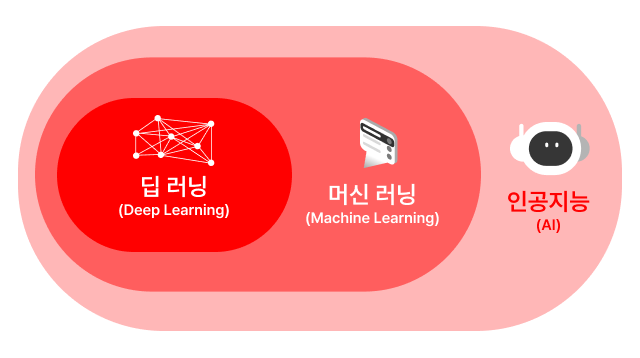


### 1-1. 인공지능 (Artificial Intelligence)
- 컴퓨터가 인간과 같이 생각할 수 있도록 만드는 기법을 연구하는 학문


### 1-2. 머신러닝 (Machine Learning)
- 데이터에 기반한 학습을 통해 인공지능을 구현하는 기법들을 지칭  
- 컴퓨터가 스스로 데이터의 규칙을 학습


#### 대표적인 알고리즘 예시
- SVM (Support Vector Machine) : 데이터를 가장 잘 분류하는 경계선을 찾는 알고리즘  
- KNN (K-Nearest Neighbors) : 새로운 데이터가 들어왔을 때, 가까운 K개의 데이터를 보고 다수결로 데이터를 분류  
- NBC(Naive Bayes Classifier) : 베이즈 정리(Bayes’ theorem)를 기반으로 하는 확률 계산으로 가장 가능성이 높은 클래스(정답)로 데이터를 분류하는 알고리즘


### 1-3. 딥러닝 (Deep Learning)
- 머신러닝 기법 중 하나인 **인공신경망(Artificial Neural Networks)** 의 은닉층(Hidden Layer)을 깊게 쌓은 구조를 이용해 학습하는 기법  
- 사람 뇌의 신경세포(뉴런) 구조에서 영감을 받아 만들어짐  
- **퍼셉트론(Perceptron)** : 인공신경망의 가장 기본이 되는 단위 (= 인공 뉴런)


# 2. 머신러닝 실습

- 파라미터 목록을 참고하여 파라미터 조합별 모델 학습 결과 비교해보기(목록 외에도 자유롭게 조정 가능)

## Iris


*  아이리스 품종 중 Setosa, Versicolor, Virginica 분류에 대한 로널드 피셔의 1936년 논문에서 사용된 데이터 셋
*   꽃받침(Sepal)과 꽃잎(Petal)의 길이 너비로 세개 품종을 분류

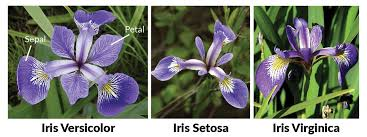


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [ ]:
# 데이터 불러오기
iris = datasets.load_iris()
X, Y = iris.data[:, :2], iris.target  # iris 특징 중 2개 특징만 사용

# 데이터의 형태 출력 (선택된 X 기준)
print("데이터의 형태:", X.shape)  # (150, 2)

# 데이터의 특징 출력 (선택된 feature 기준)
print("데이터의 특징:", iris.feature_names[:2])  # 처음 2개 특징 이름

# 레이블 예시
print("학습 데이터 라벨(정답) 처음 10개:", Y[:10])

# 데이터 예시 (선택된 2개 특징만)
print("처음 10개의 데이터 값 (선택된 2개 특징만):\n", X[:10])

데이터의 형태: (150, 2)
데이터의 특징: ['sepal length (cm)', 'sepal width (cm)']
학습 데이터 라벨(정답) 처음 10개: [0 0 0 0 0 0 0 0 0 0]
처음 10개의 데이터 값 (선택된 2개 특징만):
 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]]


In [ ]:
# 데이터를 8:2로 학습과 테스트로 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 데이터 전처리
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 2-1. SVM(Support Vector Machine)

- 두 개의 그룹(데이터)을 분리하는 방법으로 데이터들과 거리가 가장 먼 초평면(hyperplane)을 선택하여 분리하는 방법

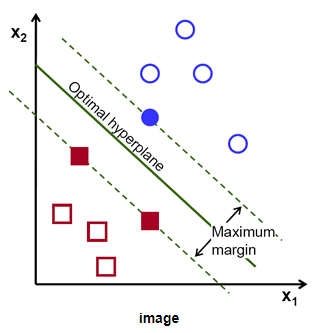

In [ ]:
# 파라미터 목록
kernel = ['linear', 'poly', 'rbf', 'sigmoid'] # 데이터 분류에 사용할 커널 함수 종류
C = [0.1, 1, 10] # 마진의 너비 조정
gamma = [0.1, 1, 2] # 각 데이터 포인트가 영향력을 미치는 범위 결정

# SVM 모델 불러오기
svm = SVC(kernel='sigmoid', C=0.1, gamma=1)

# SVM 모델 학습
svm.fit(X_train, Y_train)

# SVM 모델 테스트
print("SVM 정확도:", accuracy_score(Y_test, svm.predict(X_test)))

# 테스트 데이터 예측값
y_pred = svm.predict(X_test)

# 처음 10개 테스트 데이터의 실제값 vs 예측값 출력
print("\n첫 10개 테스트 샘플: 실제값 vs 예측값")
for i in range(10):
    print(f"샘플 {i+1}: 실제값 = {Y_test[i]}, 예측값 = {y_pred[i]}")

SVM 정확도: 0.9333333333333333

첫 10개 테스트 샘플: 실제값 vs 예측값
샘플 1: 실제값 = 1, 예측값 = 1
샘플 2: 실제값 = 0, 예측값 = 0
샘플 3: 실제값 = 2, 예측값 = 2
샘플 4: 실제값 = 1, 예측값 = 1
샘플 5: 실제값 = 1, 예측값 = 2
샘플 6: 실제값 = 0, 예측값 = 0
샘플 7: 실제값 = 1, 예측값 = 1
샘플 8: 실제값 = 2, 예측값 = 2
샘플 9: 실제값 = 1, 예측값 = 1
샘플 10: 실제값 = 1, 예측값 = 1


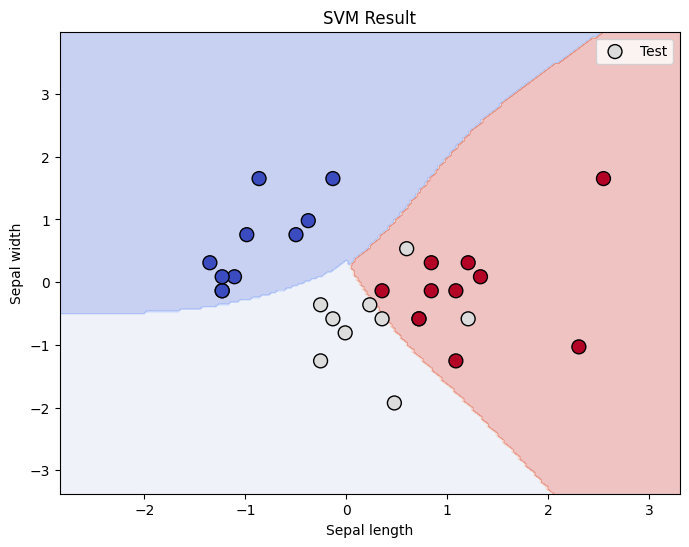

In [ ]:
import matplotlib.pyplot as plt

# meshgrid 생성
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# 예측
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 시각화(배경 색: 예측값, 점 색: 실제값)
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.coolwarm, edgecolors='k', s=100, label='Test')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("SVM Result")
plt.legend()
plt.show()

### 다음 질문에 답하시오(더블 클릭 후 답안 작성)
- kernel에 따라 어떻게 변화하는가?
 - C = 0.1, gamma = 'scale'
   - kernel = liner일 때 정확도는 0.9이다
   - kernel = poly일 때 정확도는 0.53333...이다
   - kernel = rbf일 때 정확도는 0.8이다
   - kernel = sigmoid일 때 정확도는 0.9333...이다
- C 값이 증가하면 어떻게 변화하는가?
 - kernel = liner, gamma = 'scale'
   - C = 0.1, 1, 10 에서의 정확도는 모두 0.9로 동일하다
 - kernel = poly, gamma = 'scale'
   - C = 0.1, 1, 10 에서의 정확도는 각각 0.5333.., 0.666.., 0.7333..으로 C값이 증가함에 따라 정확도가 올라가는 것을 볼수 있다.
 - kernel = rbf, gamma = 'scale'
   - C = 0.1, 1, 10 에서의 정확도는 각각 0.8, 0.8333.., 0.8666...으로 C값이 증가함에 따라 정확도가 올라가는 것을 볼수 있다.
 - kernel = sigmoid, gamma = 'scale'
   - C = 0.1, 1, 10 에서의 정확도는 각각 0.9333.., 0.7666.., 0.8이다.
- gamma 값이 증가하면 어떻게 변화하는가?
 - kernel = liner, C = 0.1
   - gamma값이 0.1, 1, 2 에서의 정확도는 모두 0.9로 변함이 없다.
 - kernel = poly, C = 0.1
   - gamma값이 0.1, 1, 2 에서의 정확도는 각각 0.3, 0.666.., 0.766..으로 정확도가 올라간다.
 - kernel = rbf, C = 0.1
   - gamma값이 0.1, 1, 2 에서의 정확도는 각각 0.766.., 0.766.., 0.633..으로 정확도가 올라간다.
 - kernel = sigmoid, C = 0.1
   - gamma값이 0.1, 1, 2 에서의 정확도는 각각 0.666.., 0.933.., 0.8이다

## 2-2. KNN(K-Nearest Neighbors)

- 새로운 입력으로 들어온 데이터를 특정값으로 분류하는데 현재 데이터와 가장 가까운 k개의 데이터를 찾아 가장 많은 분류 값으로 현재의 데이터를 분류하는 알고리즘

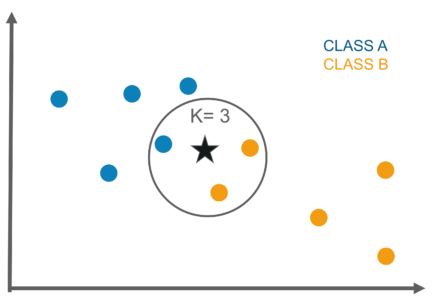

http://vision.stanford.edu/teaching/cs231n-demos/knn/


In [ ]:
# 파라미터 목록
n_neighbors = [3, 5, 10] # 예측 시 고려할 이웃 데이터 개수 (K)
weights = ['uniform', 'distance'] # 이웃의 영향력(weight) 부여 방식

# KNN 모델 불러오기
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

# KNN 모델 학습
knn.fit(X_train, Y_train)

# KNN 모델 테스트
print("KNN 정확도:", accuracy_score(Y_test, knn.predict(X_test)))

# 테스트 데이터 예측값
y_pred = knn.predict(X_test)

# 처음 10개 테스트 데이터의 실제값 vs 예측값 출력
print("\n첫 10개 테스트 샘플: 실제값 vs 예측값")
for i in range(10):
    print(f"샘플 {i+1}: 실제값 = {Y_test[i]}, 예측값 = {y_pred[i]}")

KNN 정확도: 0.7666666666666667

첫 10개 테스트 샘플: 실제값 vs 예측값
샘플 1: 실제값 = 1, 예측값 = 1
샘플 2: 실제값 = 0, 예측값 = 0
샘플 3: 실제값 = 2, 예측값 = 2
샘플 4: 실제값 = 1, 예측값 = 1
샘플 5: 실제값 = 1, 예측값 = 1
샘플 6: 실제값 = 0, 예측값 = 0
샘플 7: 실제값 = 1, 예측값 = 1
샘플 8: 실제값 = 2, 예측값 = 1
샘플 9: 실제값 = 1, 예측값 = 1
샘플 10: 실제값 = 1, 예측값 = 1


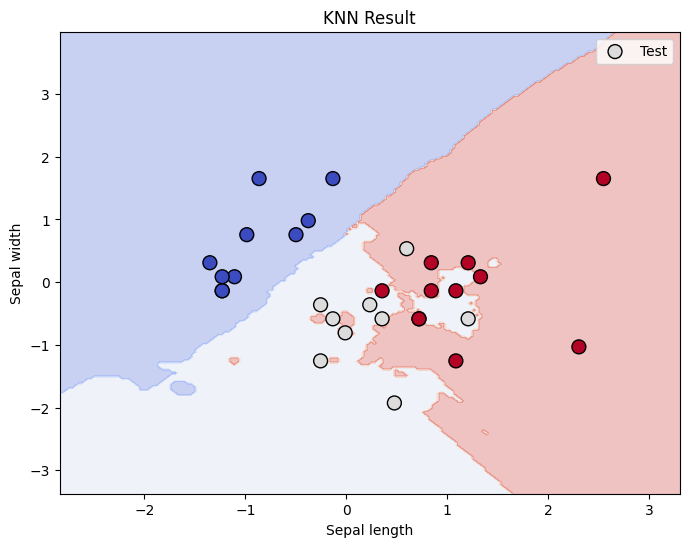

In [ ]:
# meshgrid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# 예측
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 시각화(배경 색: 예측값, 점 색: 실제값)
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.coolwarm, edgecolors='k', s=100, label='Test')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("KNN Result")
plt.legend()
plt.show()

### 다음 질문에 답하시오(더블 클릭 후 답안 작성)
- n_neighbors 값이 증가하면 어떻게 변화하는가?
 - weights = 'uniform'
   - n_neighbors 값이 3, 5, 10으로 점점 증가함에 따라 정확도는 각각 0.833.., 0.833.., 0.766..으로 감소하였다.
- weights에 따라 어떻게 변화하는가?
 - weights = 'uniform'일 때 값이 3, 5, 10일 때 정확도는 각각 0.833.., 0.833.., 0.766..이다
 -  weights = 'distance'일 때 값이 3, 5, 10일 때 정확도는 각각 0.833.., 0.833.., 0.833..이다
 - weight = 'uniform'일 때 n_neighbors의 값이 증가함에 따라 weights = 'distance'일 때 보다 정확도가 더 낮아진다

## 2-3. NBC(Naive Bayes Classifier)

- 베이즈 이론을 기반으로 하는 확률 분류 모델 중 하나

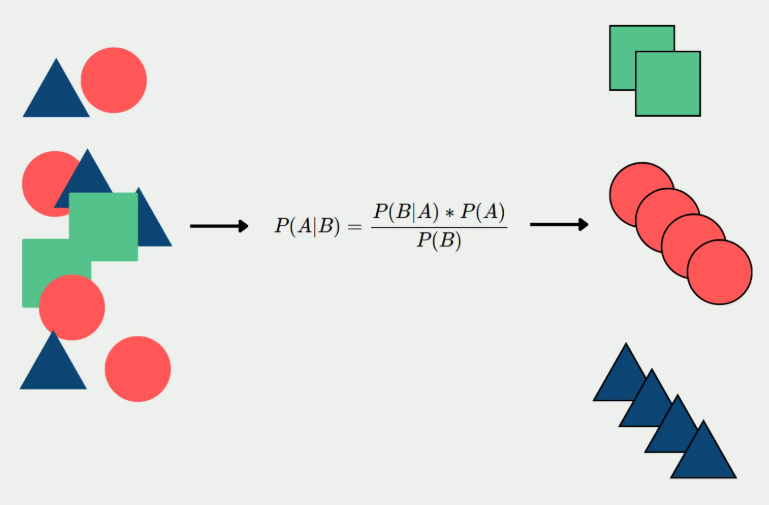

In [ ]:
# 파라미터 목록
var_smoothing= [1e-9, 1e-8, 1e-7, 1e-6] # 분산(variance)에 작은 값을 더해 계산 안정성을 높임

# NBC 모델 불러오기
nb = GaussianNB(var_smoothing=1e-9)

# NBC 모델 학습
nb.fit(X_train, Y_train)

# NBC 모델 테스트
print("Naive Bayes 정확도:", accuracy_score(Y_test, nb.predict(X_test)))

# 테스트 데이터 예측값
y_pred = nb.predict(X_test)

# 처음 10개 테스트 데이터의 실제값 vs 예측값 출력
print("\n첫 10개 테스트 샘플: 실제값 vs 예측값")
for i in range(10):
    print(f"샘플 {i+1}: 실제값 = {Y_test[i]}, 예측값 = {y_pred[i]}")

Naive Bayes 정확도: 0.9

첫 10개 테스트 샘플: 실제값 vs 예측값
샘플 1: 실제값 = 1, 예측값 = 1
샘플 2: 실제값 = 0, 예측값 = 0
샘플 3: 실제값 = 2, 예측값 = 2
샘플 4: 실제값 = 1, 예측값 = 1
샘플 5: 실제값 = 1, 예측값 = 2
샘플 6: 실제값 = 0, 예측값 = 0
샘플 7: 실제값 = 1, 예측값 = 1
샘플 8: 실제값 = 2, 예측값 = 2
샘플 9: 실제값 = 1, 예측값 = 1
샘플 10: 실제값 = 1, 예측값 = 1


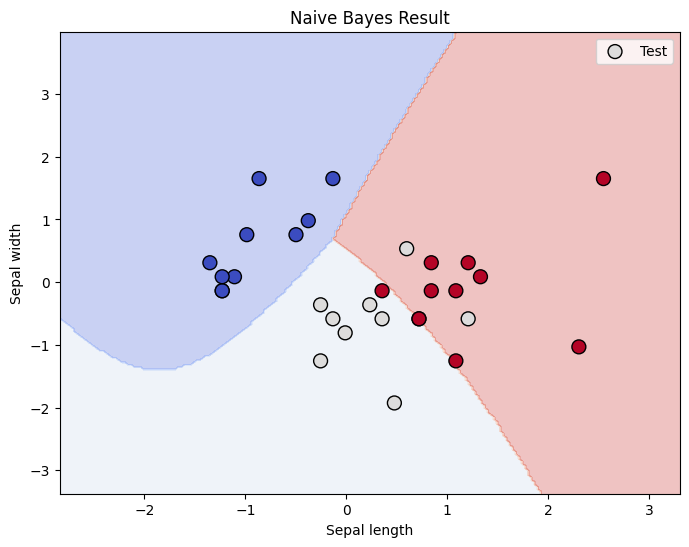

In [ ]:
# meshgrid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# 예측
Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 시각화(배경 색: 예측값, 점 색: 실제값)
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, cmap=plt.cm.coolwarm, edgecolors='k', s=100, label='Test')
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Naive Bayes Result")
plt.legend()
plt.show()

### 다음 질문에 답하시오(더블 클릭 후 답안 작성)
- var_smoothing 값이 증가하면 어떻게 변화하는가?
 - var_smoothing이 1e-9, 1e-8, 1e-7, 1e-6일 때 정확도는 모두 0.9로 같았다